In [99]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [2]:
normales = pd.read_excel("estaturas.xlsx", sheet_name="normales")
normales

,Estatura(metros),Edad(años)
0,1.77,26.0
1,1.74,31.0
2,1.72,24.0
3,1.78,34.0
4,1.65,32.0
5,1.66,29.0
6,1.64,27.0
7,1.85,34.0
8,1.85,26.0
9,1.75,21.0


In [3]:
scaler = StandardScaler()
scaler.fit(normales)
train = scaler.transform(normales)
train

array([[ 0.62277299, -0.60419651],
       [ 0.21359569,  0.17304657],
       [-0.05918917, -0.91509374],
       [ 0.75916542,  0.63939242],
       [-1.01393619,  0.32849519],
       [-0.87754376, -0.13785066],
       [-1.15032862, -0.44874789],
       [ 1.71391244,  0.63939242],
       [ 1.71391244, -0.60419651],
       [ 0.34998813, -1.38143959],
       [ 0.07720326, -1.07054236],
       [ 0.89555785, -0.75964513],
       [ 1.30473515, -0.91509374],
       [-1.01393619, -0.75964513],
       [ 0.89555785, -0.75964513],
       [-0.05918917,  0.63939242],
       [-0.33197403, -0.60419651],
       [-2.10507564, -0.75964513],
       [-0.87754376, -0.60419651],
       [ 0.34998813, -0.44874789],
       [ 0.62277299,  0.32849519],
       [ 1.03195028,  1.57208412],
       [ 1.71391244, -0.75964513],
       [ 1.30473515, -0.91509374],
       [ 0.34998813,  1.26118689],
       [ 0.07720326,  0.63939242],
       [-2.37786051, -0.13785066],
       [ 0.48638056, -0.29329928],
       [-0.60475889,

# Implementando K Means

In [129]:
class KMeans:
    def __init__(self, K, max_iters):
        self.K = K
        self.max_iters = max_iters
        self.centroids = None
        self.distortion = None
        
    def euclidean_distance(self, point, data):
        return np.sqrt(np.sum((point - data)**2, axis=1))
        
    def fit(self, data):
        min_values = np.min(data, axis=0)
        max_values = np.max(data, axis=0)
        self.centroids = [np.random.uniform(min_values, max_values) for k in range(self.K)]
        
        i = 0
        prev_centroids = None   
        while i <= self.max_iters and not np.array_equal(self.centroids, prev_centroids):
            clusters = [[] for k in range(self.K)]
            prev_centroids = self.centroids.copy()
            
            for x in data:
                x_distance_to_centroids = self.euclidean_distance(x, np.array(self.centroids))
                x_cluster = np.argmin(x_distance_to_centroids)
                clusters[x_cluster].append(x)
                
            self.centroids = [np.mean(cluster, axis=0) for cluster in clusters]  
            for i, centroid in enumerate(self.centroids):
                if np.isnan(centroid).any():
                    self.centroids[i] = prev_centroids[i]
            i += 1
            
        distortion = 0
        for j, cluster in enumerate(clusters):
            if cluster:
                distortion += np.sum(np.square(self.centroids[j]-np.array(cluster)))
        self.distortion = distortion
        
        return np.array(self.centroids)
    
    def predict(self, X):
        clusters = []
        for x in X:
            dists = self.euclidean_distance(x, self.centroids)
            cluster = np.argmin(dists)
            clusters.append(cluster)
        
        return np.array(clusters)
            
    def get_centroids(self):
        return np.array(self.centroids)
    
    def get_distortion(self):
        return self.distortion

In [16]:
kmeans = KMeans(3, 500)
kmeans.fit(train), kmeans.get_distortion()

([array([1.39566344, 2.71204064]),
  array([ 0.70336852, -0.59006482]),
  array([-0.70218206,  0.17304657])],
 44.90286139420016)

In [ ]:
gm = GaussianMixture(n_components=3, random_state=0)
gm.fit(train)
gm.means_, gm.score(train)

# Experimentos

In [77]:
Ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
kmeans = []
gaussians = []
for K in Ks:
    np.random.seed(1337)
    km = KMeans(K, 3000)
    km.fit(train)
    kmeans.append([K, km.get_distortion()])
    
    gm = GaussianMixture(n_components=K)
    gm.fit(train)
    gaussians.append([K, gm.score(train)])
    
kmeans = np.array(kmeans)
gaussians = np.array(gaussians)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\c

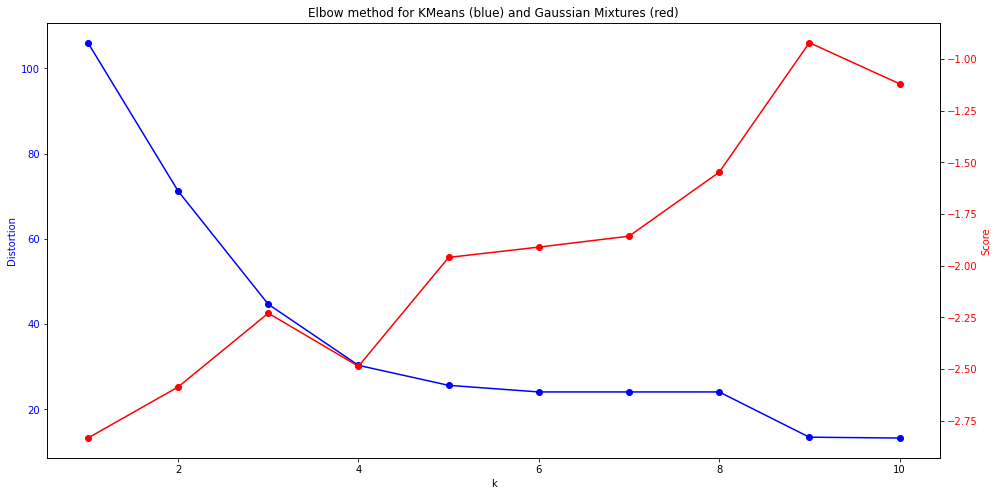

In [189]:
fig, ax1 = plt.subplots()
fig.set_size_inches(16,8)

ax1.plot(kmeans[:,0], kmeans[:,1], 'bo-')
ax1.set_xlabel('k')
ax1.set_ylabel('Distortion', color='b')
ax1.set_title('Elbow method for KMeans (blue) and Gaussian Mixtures (red)')
ax1.tick_params(axis='y', labelcolor='b')

ax2 = ax1.twinx()

ax2.plot(gaussians[:,0], gaussians[:,1], 'ro-')
ax2.set_xlabel('k')
ax2.set_ylabel('Score', color='r')
ax2.tick_params(axis='y', labelcolor='r')

plt.show()

Parece ser que K=3 es un parametro indicado antes de observar un cambio repentido, aunque quiza valga la pena considerar el caso donde K = 4 tambien. Veamos los clusters resultantes:

In [151]:
np.random.seed(1337)
K = 3
km = KMeans(K, 1000)
km.fit(train)
km_preds = km.predict(train)

gm = GaussianMixture(n_components=K)
gm.fit(train)
gm_preds = gm.predict(train)

<AxesSubplot:title={'center':'KMeans - K = 3'}, xlabel='Estatura(metros)', ylabel='Edad(años)'>

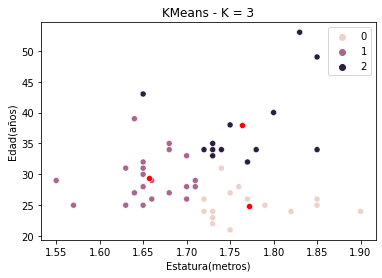

In [152]:
sns.scatterplot(x = normales.iloc[:, 0], y = normales.iloc[:, 1], hue=km_preds).set_title("KMeans - K = 3")
centroids = km.get_centroids()
unscaled_centroids = scaler.inverse_transform(centroids)
sns.scatterplot(x = unscaled_centroids[:, 0], y = unscaled_centroids[:, 1], color="red")

Text(0.5, 1.0, 'Gaussian Mixture - K = 3')

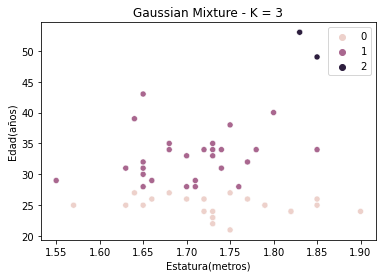

In [153]:
sns.scatterplot(x = normales.iloc[:, 0], y = normales.iloc[:, 1], hue=gm_preds).set_title("Gaussian Mixture - K = 3")

In [154]:
np.random.seed(1337)
K = 4
km = KMeans(K, 1000)
km.fit(train)
km_preds = km.predict(train)

gm = GaussianMixture(n_components=K)
gm.fit(train)
gm_preds = gm.predict(train)

<AxesSubplot:title={'center':'KMeans - K = 4'}, xlabel='Estatura(metros)', ylabel='Edad(años)'>

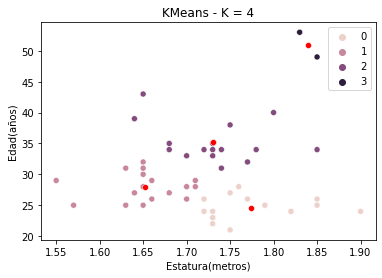

In [155]:
sns.scatterplot(x = normales.iloc[:, 0], y = normales.iloc[:, 1], hue=km_preds).set_title("KMeans - K = 4")
centroids = km.get_centroids()
unscaled_centroids = scaler.inverse_transform(centroids)
sns.scatterplot(x = unscaled_centroids[:, 0], y = unscaled_centroids[:, 1], color="red")

Text(0.5, 1.0, 'Gaussian Mixture - K = 4')

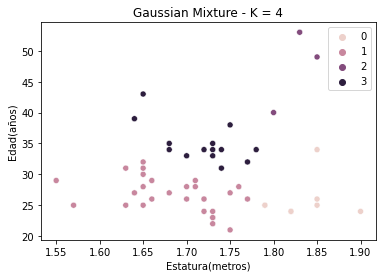

In [156]:
sns.scatterplot(x = normales.iloc[:, 0], y = normales.iloc[:, 1], hue=gm_preds).set_title("Gaussian Mixture - K = 4")

Parece ser que existen tres grupos base:

1) Jovenes de estatura baja
1) Jovenes de estatura alta
1) Personas de alta edad, independiente de su estatura

Cuando vemos el cuarto cluster creado con K=4 observamos que realmente es una extension del tercer cluster, con la distincion de que son las personas mas fuera de serie de la poblacion, siendo de muy alta edad y muy alta estatura, pero este cluster provee poca informacion nueva, pero se debe hacer esta distincion porque cuando K=3, GM paree hacer distinciones puramente basado en edades y no en las estaturas. En otras palabras, el metodo del codo nos ayudo a identificar los posibles mejores valores de K segun el algoritmo utilizado y segun el tipo de clusterizacion que buscamos (solo edad vs edad junto con estatura)

# Utilizando valtest con GM cuando K = 4

Se usa K = 4 porque a mi parecer, es mas informativo tener una agrupacion donde se toma en cuenta tanto la edad como la estatura

In [158]:
valtest = pd.read_excel("estaturas.xlsx", sheet_name="valtest(normales)")
valtest

,Estatura(metros),Edad(años)
0,1.82,25.0
1,1.80,27.0
2,1.60,31.0
3,1.60,35.0
4,1.82,30.0
5,1.76,32.0
6,1.79,31.0
7,1.61,31.0


In [161]:
scaled_valtest = scaler.transform(valtest)
gm_valtest_preds = gm.predict(scaled_valtest)
gm_valtest_preds

array([0, 0, 1, 1, 0, 3, 3, 1], dtype=int64)

Text(0.5, 1.0, 'Gaussian Mixture - K = 4')

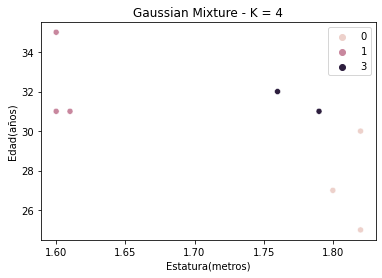

In [176]:
sns.scatterplot(x = valtest.iloc[:, 0], y = valtest.iloc[:, 1], hue=gm_valtest_preds).set_title("Gaussian Mixture - K = 4")

Probabilidades de que cada observacion pertenezca a cada cluster:

In [177]:
gm.predict_proba(scaled_valtest)

array([[7.74888344e-01, 2.09674480e-01, 2.62810822e-08, 1.54371502e-02],
       [6.67578098e-01, 2.51429857e-01, 8.40393991e-05, 8.09080058e-02],
       [5.97318480e-05, 9.99780043e-01, 1.26987095e-40, 1.60225316e-04],
       [3.02494163e-05, 8.17157270e-01, 4.12201240e-44, 1.82812481e-01],
       [7.76416949e-01, 2.86519939e-02, 7.34725622e-05, 1.94857584e-01],
       [5.14917300e-02, 2.67866315e-02, 8.08096435e-03, 9.13640674e-01],
       [2.95842295e-01, 3.74637707e-02, 1.97710061e-02, 6.46922928e-01],
       [1.11125726e-04, 9.99410167e-01, 1.81267148e-36, 4.78707178e-04]])

<AxesSubplot:ylabel='Count'>

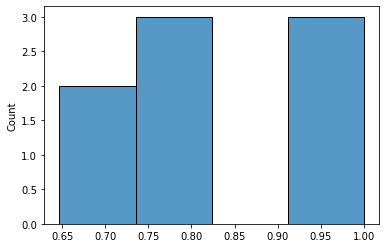

In [181]:
#Histograma de probabilidades de que cada observacion pertenezca a su clsuter asignado
sns.histplot(np.max(gm.predict_proba(scaled_valtest), axis = 1))

# Simulacion Monte Carlo usando GM
Se desea estimar E(X), donde X: R^2 -> R tal que f(estatura, edad) = estatura/edad

In [185]:
samples = gm.sample(1000)
height_and_age = samples[0]
unscaled_haa = scaler.inverse_transform(height_and_age)
unscaled_haa

array([[ 1.8760794 , 27.16556594],
       [ 1.84738054, 25.36482085],
       [ 1.90295516, 31.70667873],
       ...,
       [ 1.74794521, 33.12362731],
       [ 1.70566789, 37.77484893],
       [ 1.70306846, 34.43297097]])

In [187]:
np.mean(unscaled_haa[:, 0]/unscaled_haa[:, 1])

0.06068380475027981

Tenemos un numero muy pequeño, lo cual tiene sentido debido a que estamos diviendo una estatura en metros (de 1.55 a 1.90) entre una edad (de 20 a 50+)